In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Directory containing JSON files for each project
projects_directory = './'

# List to store DataFrames for each project
project_dfs = []

# Iterate through JSON files in the directory
for filename in os.listdir(projects_directory):
    if filename.endswith('.json'):
        file_path = os.path.join(projects_directory, filename)

        # Load JSON data from the file
        with open(file_path, 'r') as file:
            project_data = json.load(file)

        # Extract import data from the project_data
        imports_list = project_data.get('imports', [])
        
        # Create a list of dictionaries with "import_type", "name", and "lineno"
        imports_dicts = []
        for import_data in imports_list:
            import_type = list(import_data.keys())[0]
            # Combine primary alternative and alternative imports into a single alternative import type
            display_import_type = import_type.removesuffix(" (primary)")
            import_dict = {
                "import_type": display_import_type,
                "name": import_data[import_type]["name"],
                "lineno": import_data[import_type]["source"]["lineno"]
            }
            imports_dicts.append(import_dict)

        # Create a DataFrame from the list of dictionaries
        imports_data = pd.DataFrame(imports_dicts)
        imports_data['project_name'] = project_data.get('project_name')

        # Append the DataFrame to the list
        project_dfs.append(imports_data)

# Combine all project DataFrames into a single DataFrame
overall_df = pd.concat(project_dfs, ignore_index=True)

# Display the result
print(overall_df)

                   import_type         name  lineno project_name
0                    Docstring        numpy      38  statsmodels
1                    Docstring        numpy     114  statsmodels
2                    Docstring        numpy     154  statsmodels
3                    Docstring        numpy      42  statsmodels
4                    Docstring        scipy     594  statsmodels
...                        ...          ...     ...          ...
2223  Dynamic imports (pytest)  scipy.stats      30       pandas
2224  Dynamic imports (pytest)  scipy.stats      44       pandas
2225  Dynamic imports (pytest)  scipy.stats      59       pandas
2226  Dynamic imports (pytest)  scipy.stats      78       pandas
2227  Dynamic imports (pytest)       jinja2     222       pandas

[2228 rows x 4 columns]


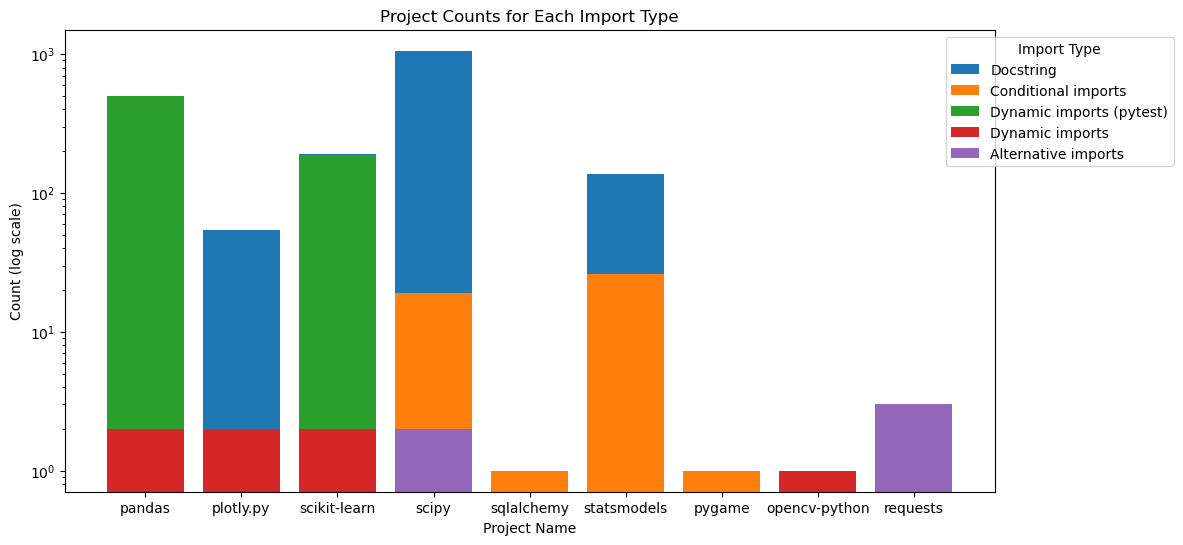

In [3]:
# Create a bar plot for the counts of each import type
plt.figure(figsize=(12, 6))

# Iterate over unique import types and plot a bar for each
for import_type in overall_df['import_type'].unique():
    import_type_data = overall_df[overall_df['import_type'] == import_type]
    project_counts = import_type_data.groupby('project_name').size()
    plt.bar(project_counts.index, project_counts, label=import_type)
    plt.yscale('log')  # Apply log scale to the y-axis for the plot
    plt.ylabel('Count (log scale)')
    plt.title('Project Counts for Each Import Type')
    plt.legend(title='Import Type', loc='upper right', bbox_to_anchor=(1.2, 1))

# Set the common x-axis label
plt.xlabel('Project Name')

plt.show()